In [1]:
import re
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
f_sev = open("../generator/output_snp.log", "r").readlines()
f_vanilla = open("../generator/output_vanilla.log", "r").readlines()

lines_sev = []
for a in f_sev:
    if a.startswith("Starting"):
        lines_sev.append(a.rstrip())
    elif ("Mbits/sec" in a):
        lines_sev.append(a.strip())
data_sev = []
for i in range(0, len(lines_sev), 2):
    numbers = re.findall(r'\d+', lines_sev[i])
    if numbers:
        numbers.append(re.findall(r'\d+', lines_sev[i+1])[0])
        data_sev.append(numbers)
with open('output_sev.csv', 'w', newline='') as file_sev:
    writer = csv.writer(file_sev)
    writer.writerow(['cpusnort', 'psize', 'tcpflows', 'tput'])
    writer.writerows(data_sev)
        
lines_vanilla = []
for a in f_vanilla:
    if a.startswith("Starting"):
        lines_vanilla.append(a.rstrip())
    elif ("Mbits/sec" in a):
        lines_vanilla.append(a.strip())
data_vanilla = []
for i in range(0, len(lines_vanilla), 2):
    numbers = re.findall(r'\d+', lines_vanilla[i])
    if numbers:
        numbers.append(re.findall(r'\d+', lines_vanilla[i+1])[0])
        data_vanilla.append(numbers)

with open('output_vanilla.csv', 'w', newline='') as file_vanilla:
    writer = csv.writer(file_vanilla)
    writer.writerow(['cpusnort', 'psize', 'tcpflows', 'tput'])
    writer.writerows(data_vanilla)

In [18]:
def filterdata(key, num, inp_data):
    keys = ['cpusnort', 'psize', 'tcpflows', 'tput']
    dict_data = [dict(zip(keys, row)) for row in inp_data]
    df = pd.DataFrame(dict_data)
    df[keys] = df[keys].apply(pd.to_numeric)
    
    df_filtered_1 = df[df['cpusnort'] == 1]
    df_filtered_1 = df_filtered_1[df_filtered_1[key] == num]

    df_filtered_2 = df[df['cpusnort'] == 2]
    df_filtered_2 = df_filtered_2[df_filtered_2[key] == num]

    if key == "tcpflows":
        x = np.arange(len(df_filtered_1['psize']))
        x_point = df_filtered_1['psize']
    elif key == "psize":
        x = np.arange(len(df_filtered_1['tcpflows']))    
        x_point = df_filtered_1['tcpflows']
    
    return x, x_point, df_filtered_1['tput'], df_filtered_2['tput']

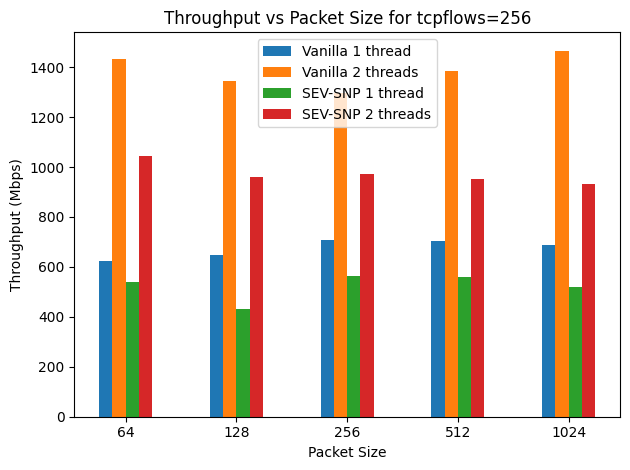

In [20]:
x, xp, y1, y2 = filterdata("tcpflows", 256, data_vanilla)
x, xp, y3, y4 = filterdata("tcpflows", 256, data_sev)
width = 0.12 

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, y1, width, label='Vanilla 1 thread')
rects2 = ax.bar(x - 0.5*width, y2, width, label='Vanilla 2 threads')
rects3 = ax.bar(x + 0.5*width, y3, width, label='SEV-SNP 1 thread')
rects4 = ax.bar(x + 1.5*width, y4, width, label='SEV-SNP 2 threads')

ax.set_xlabel('Packet Size')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Throughput vs Packet Size for tcpflows=256')
ax.set_xticks(x)
ax.set_xticklabels(xp)
ax.legend()
fig.tight_layout()
plt.show()

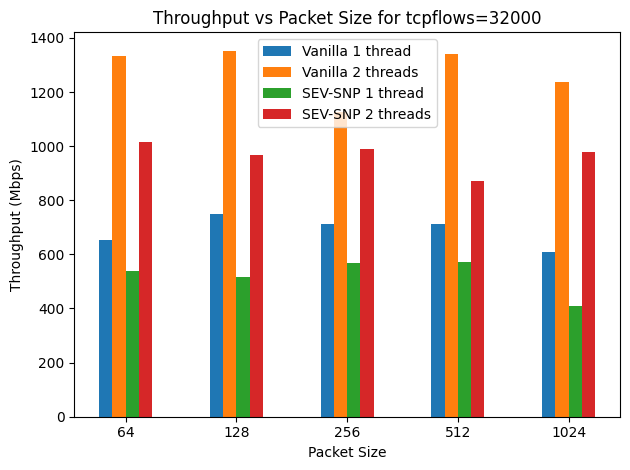

In [21]:
x, xp, y1, y2 = filterdata("tcpflows", 32000, data_vanilla)
x, xp, y3, y4 = filterdata("tcpflows", 32000, data_sev)
width = 0.12 

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, y1, width, label='Vanilla 1 thread')
rects2 = ax.bar(x - 0.5*width, y2, width, label='Vanilla 2 threads')
rects3 = ax.bar(x + 0.5*width, y3, width, label='SEV-SNP 1 thread')
rects4 = ax.bar(x + 1.5*width, y4, width, label='SEV-SNP 2 threads')

ax.set_xlabel('Packet Size')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Throughput vs Packet Size for tcpflows=32000')
ax.set_xticks(x)
ax.set_xticklabels(xp)
ax.legend()
fig.tight_layout()
plt.show()

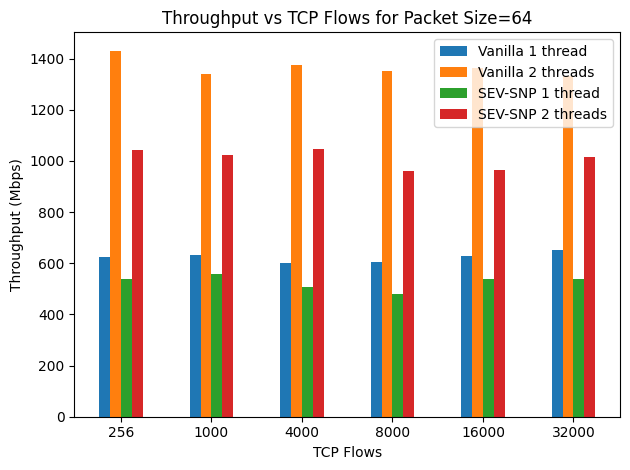

In [23]:
x, xp, y1, y2 = filterdata("psize", 64, data_vanilla)
x, xp, y3, y4 = filterdata("psize", 64, data_sev)
width = 0.12 

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, y1, width, label='Vanilla 1 thread')
rects2 = ax.bar(x - 0.5*width, y2, width, label='Vanilla 2 threads')
rects3 = ax.bar(x + 0.5*width, y3, width, label='SEV-SNP 1 thread')
rects4 = ax.bar(x + 1.5*width, y4, width, label='SEV-SNP 2 threads')

ax.set_xlabel('TCP Flows')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Throughput vs TCP Flows for Packet Size=64')
ax.set_xticks(x)
ax.set_xticklabels(xp)
ax.legend()
fig.tight_layout()
plt.show()

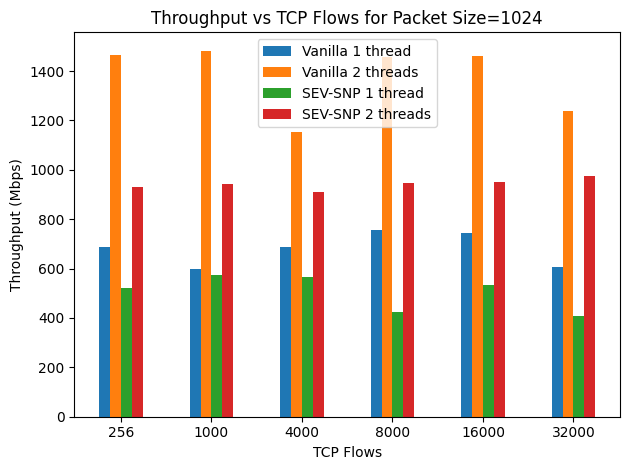

In [24]:
x, xp, y1, y2 = filterdata("psize", 1024, data_vanilla)
x, xp, y3, y4 = filterdata("psize", 1024, data_sev)
width = 0.12 

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, y1, width, label='Vanilla 1 thread')
rects2 = ax.bar(x - 0.5*width, y2, width, label='Vanilla 2 threads')
rects3 = ax.bar(x + 0.5*width, y3, width, label='SEV-SNP 1 thread')
rects4 = ax.bar(x + 1.5*width, y4, width, label='SEV-SNP 2 threads')

ax.set_xlabel('TCP Flows')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Throughput vs TCP Flows for Packet Size=1024')
ax.set_xticks(x)
ax.set_xticklabels(xp)
ax.legend()
fig.tight_layout()
plt.show()